In [1]:
# Dependencies
import json
import requests as req
from citipy import citipy 
import random as r 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Save config information
api_key = "572ecb9cf7bb5d1eccdea81f6bd8913d"
url = "http://api.openweathermap.org/data/2.5/weather?"
#equ_lat = -1.3552423
#equ_lon = -88.3931602
coordinates= []
city_name = []

In [3]:
def generate_random_data( num_rows):
    for _ in range(num_rows):
        dec_lat = r.random()/100 + r.randint(-90,90)
        dec_lon = r.random()/100+ r.randint(-90,90)
        #print(lat+dec_lat,lon+dec_lon )
        coordinates.append((dec_lat,dec_lon))

generate_random_data(50)





In [4]:
cities = []

for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon).city_name)
cities = list(set(cities))

In [5]:
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + str(city)
    print()
    print('City No ',cities.index(city),' City Name is ',city)
    print()
    print(query_url)


City No  0  City Name is  rock sound

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=rock sound

City No  1  City Name is  chivilcoy

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=chivilcoy

City No  2  City Name is  hithadhoo

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=hithadhoo

City No  3  City Name is  bredasdorp

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=bredasdorp

City No  4  City Name is  qaanaaq

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=qaanaaq

City No  5  City Name is  singarayakonda

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=singarayakonda

City No  6  City Name is  rocha

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=rocha

City No  7  City Name is  poykovskiy

http://

In [6]:


city_lat = []
city_lon = []
city_temp = []
city_cloud = []
city_humid = []
city_wind = []

for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + str(city)
    #rint(city,'City Name is ',city)
    #print(query_url)
    # Get weather data
    weather_response = req.get(query_url)
    weather_json = weather_response.json()
    # Get temperature from JSON response
    #print(weather_json)
    city_name.append(weather_json['name'])
    city_lat.append(weather_json['coord']['lat'])
    city_lon.append(weather_json['coord']['lon'])
    city_temp.append(weather_json['main']['temp'])
    city_cloud.append(weather_json['clouds']['all'])
    city_humid.append(weather_json['main']['humidity'])
    city_wind.append(weather_json['wind']['speed'])
city_data = pd.DataFrame({'City_name': city_name,'Lat': city_lat,'Lon':city_lon,'Temp':city_temp,
                          'Cloudiness':city_cloud,'Humidity':city_humid,'Wind_speed':city_wind})
#print(city_name)

In [7]:
city_data

,City_name,Cloudiness,Humidity,Lat,Lon,Temp,Wind_speed
0,Rock Sound,32,100,24.90,-76.20,302.086,5.71
1,Chivilcoy,0,69,-34.90,-60.02,290.086,1.86
2,Hithadhoo,68,100,-0.60,73.08,301.336,2.86
3,Bredasdorp,24,81,-34.53,20.04,284.150,2.60
4,Qaanaaq,68,100,77.48,-69.36,271.886,0.76
5,Singarayakonda,0,90,15.25,80.03,299.286,2.56
6,Rocha,12,86,-34.48,-54.33,287.736,1.86
7,Poykovskiy,76,80,61.23,73.33,277.150,3.00
8,Vardo,75,93,70.37,31.11,282.150,6.20
9,Saint George,1,13,37.10,-113.58,310.150,6.70


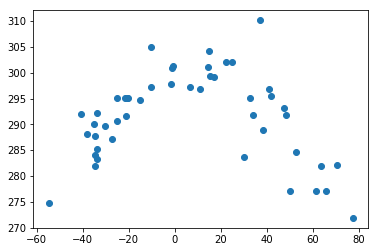

In [8]:
plt.xlabel = 'Latitude'
plt.ylabel = 'Temperature'
plt.title = 'Latitude Vs Temperate'

plt.scatter(x=city_data['Lat'],y = city_data['Temp'])
plt.show()

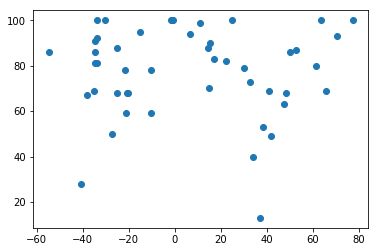

In [9]:
plt.xlabel = 'Latitude'
plt.ylabel = 'Humidity'
plt.title = 'Latitude Vs Humidity'

plt.scatter(x=city_data['Lat'],y = city_data['Humidity'])
plt.show()

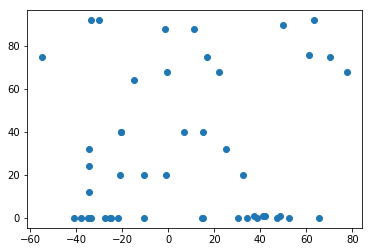

In [10]:
plt.xlabel = 'Latitude'
plt.ylabel = 'Cloudiness'
plt.title = 'Latitude Vs Cloudiness'

plt.scatter(x=city_data['Lat'],y = city_data['Cloudiness'])
plt.show()

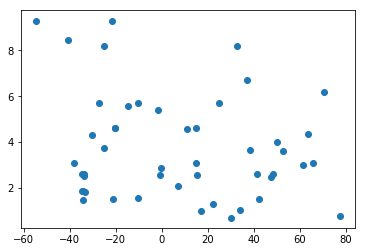

In [11]:
plt.xlabel = 'Latitude'
plt.ylabel = 'WindSpeed'
plt.title = 'Latitude Vs WindSpeed'

plt.scatter(x=city_data['Lat'],y = city_data['Wind_speed'])
plt.show()